<font color=red>\[notes ii\](1) a virtual env was not created</font>

In [1]:
# load the boston dataset
from sklearn import datasets

boston = datasets.load_boston()

In [2]:
# see the descr
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

\[notes i\](1) We can gain a lot of info from the DESCR attr of the dataset.

In [3]:
# get data and targets
boston_data = boston.data
boston_target = boston.target

In [4]:
# numpy.ndarray -> pandas dataframe obj
import numpy as np
import pandas as pd

boston_data = pd.DataFrame(boston_data, columns=boston.feature_names)
boston_target = pd.DataFrame(boston_target, columns=["MEDV"])

<font color=red>\[notes ii\](1) use the **head()** method to take a look at the top five rows</font>

In [5]:
# [notes ii](1) take a quick look
boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
# see info
boston_data.info()  # contains the info of boston_data.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


In [7]:
boston_data.describe()  # contains the info of boston_data.count()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


<font color=red>\[notes ii\](1)plot a histogram for each numerical attr with the **hist()** method</font>  
<font color=red>\[notes ii\](2)B, NOX, RAD are capped? how to judge if an attr is capped?</font>

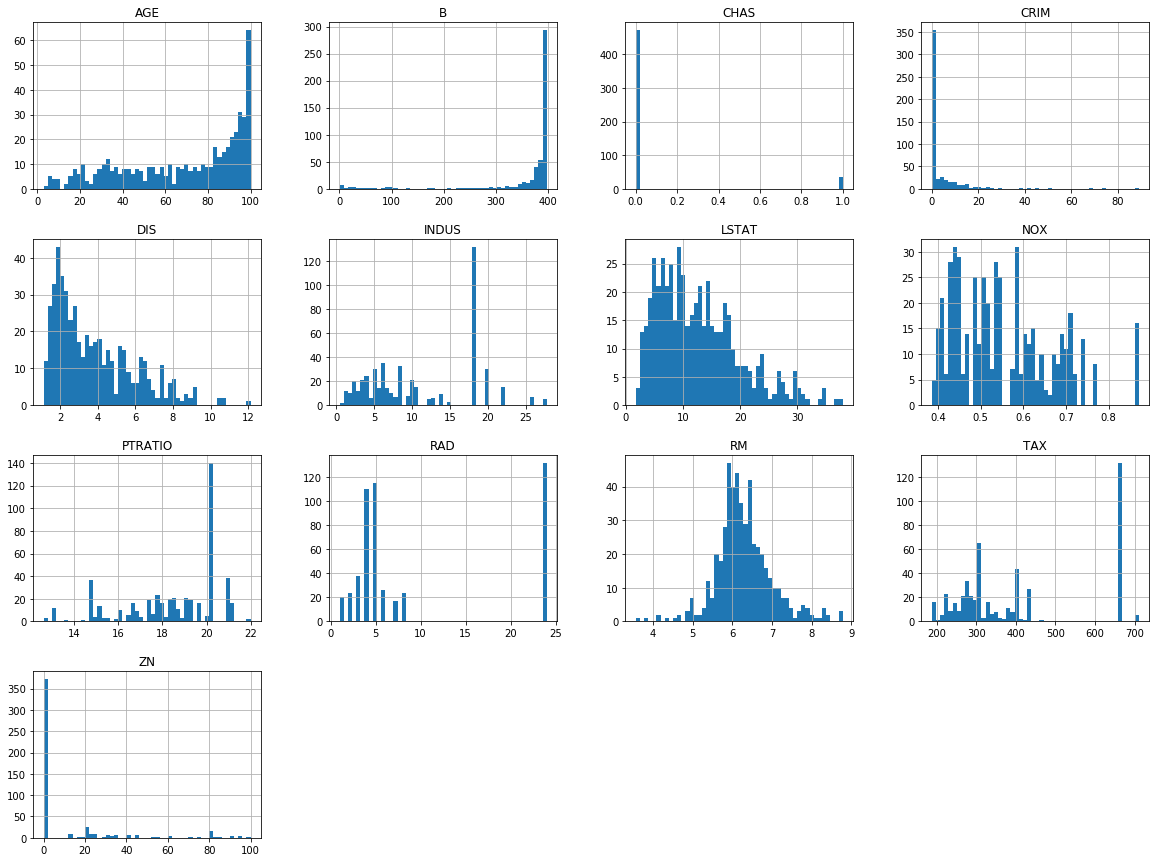

In [9]:
# [notes ii](1) histograms
%matplotlib inline
import matplotlib.pyplot as plt

boston_data.hist(bins=50, figsize=(20, 15))
plt.show()

In [10]:
# create a test set
from sklearn.model_selection import train_test_split

boston_X_train, boston_X_test, boston_y_train, boston_y_test = train_test_split(
    boston_data, boston_target, test_size=0.2, random_state=42)

<font color=red>\[notes ii\](1)discovering and visualization should be made on a **copy** of the training set</font>  
<font color=red>\[notes ii\](2)explore **correlations**</font>  

In [16]:
# [notes i](1) make a copy
boston_train = pd.concat([boston_data, boston_target], axis=1)
boston_explore = boston_train.copy()
# [notes ii](2) calculate the corr
corr_matrix = boston_explore.corr()
corr_matrix

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [18]:
# look at how much each attr correlates with the price
corr_matrix["MEDV"].sort_values(ascending=False)

MEDV       1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64

<font color=red>\[notes ii\](1)the figures plotted below can be used to check for **corrs** btw attrs</font>  
<font color=red>\[notes ii\](2)plot the price against attrs with **high** corrs</font>

In [19]:
# [notes ii](2) create an attr list
attr_list = ["MEDV", "RM", "LSTAT"]

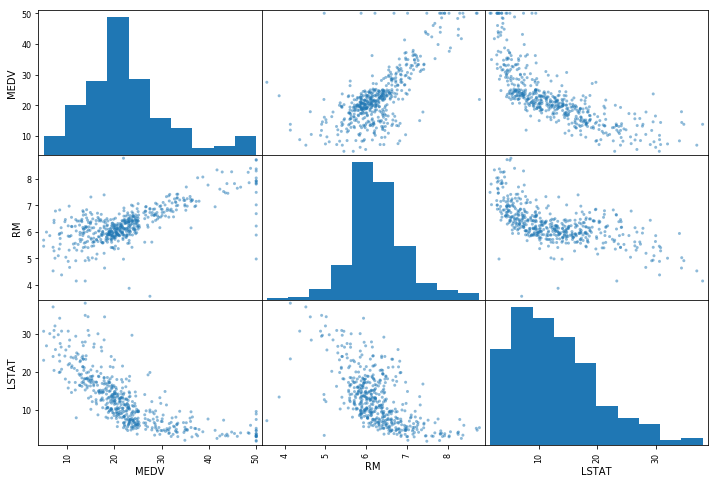

In [21]:
# plot some figures
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
%matplotlib inline

scatter_matrix(boston_explore[attr_list], figsize=(12, 8))
plt.show()

<font color=red>\[notes ii\](1)**attr combinations** may be needed to create some more useful attrs</font>

In [34]:
# preprocess data
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
std_scaler.fit(boston_X_train)
boston_X_train_prepared = std_scaler.transform(boston_X_train)

In [35]:
# train a linear regression model
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(boston_X_train_prepared, boston_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

<font color=red>\[notes ii\](1)use the **transformed** data to predict</font>

In [101]:
# [notes ii](1) transform
some_data = boston_X_train.iloc[:5]
some_data_prepared = std_scaler.transform(some_data)

some_labels = boston_y_train.iloc[:5]

# predict
print(lin_reg.predict(some_data_prepared)[:, 0])
print(list(some_labels.MEDV))  # for dataframe obj, use .iloc[0] instead of [0] directly

[11.80803093 20.39729898 24.97767539 13.351541   19.41009045]
[12.0, 19.9, 19.4, 13.4, 18.2]


In [108]:
# use cv to measure the performance
from sklearn.model_selection import cross_val_score

mse = cross_val_score(lin_reg, boston_X_train_prepared, boston_y_train, cv=10, scoring="neg_mean_squared_error")
rmse = np.sqrt(-mse)
rmse.mean()

4.829441880454278

In [104]:
# use the test set
boston_X_test_prepared = std_scaler.fit_transform(boston_X_test)
mse_test = cross_val_score(lin_reg, boston_X_test_prepared, boston_y_test, cv=10, scoring="neg_mean_squared_error")
rmse_test = np.sqrt(-mse_test)
rmse_test.mean()

4.7837493876606025